In [31]:
import pandas as pd
import pymysql 
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("WalmartRetailSales.csv", encoding="ISO-8859-1")

In [9]:
print(df)

      Row ID  Order ID  Order Date Order Priority  Order Quantity    Sales  \
0       1914     13729  12-01-2001  Not Specified               9   872.48   
1       4031     28774  12-01-2001           High              32   180.36   
2       1279      9285  12-02-2001       Critical               3   124.81   
3       5272     37537  12-02-2001            Low               4  1239.06   
4       5273     37537  12-02-2001            Low              43  4083.19   
...      ...       ...         ...            ...             ...      ...   
8394    6712     47815    12/30/15  Not Specified              45   580.96   
8395    6915     49344    12/30/15            Low              31   672.93   
8396    6916     49344    12/30/15            Low               1   803.33   
8397    7141     50950    12/30/15  Not Specified               6   391.12   
8398    7142     50950    12/30/15  Not Specified              35   448.10   

      Discount       Ship Mode   Profit  Unit Price  ...  Zip C

In [33]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='mixed', errors='coerce')
df["Year"] = df['Order Date'].dt.year 

In [19]:
conn = sqlite3.connect(":memory:")
df.to_sql("walmart_sales", conn, index=False, if_exists="replace")

8399

In [35]:
query = """
WITH Sales_Per_Year AS (
    SELECT 
        Year, 
        State, 
        SUM(Sales) AS Total_Sales
    FROM walmart_sales
    GROUP BY Year, State
),
Growth AS (
    SELECT 
        a.State,
        a.Year,
        a.Total_Sales,
        (a.Total_Sales - b.Total_Sales) * 100.0 / NULLIF(b.Total_Sales, 0) AS Growth_Rate
    FROM Sales_Per_Year a
    LEFT JOIN Sales_Per_Year b 
    ON a.State = b.State AND a.Year = b.Year + 1
)
SELECT * FROM Growth ORDER BY State, Year;
"""

In [37]:
sales_growth = pd.read_sql(query_growth, conn)

In [47]:
sales_trend = df.groupby(['State', 'Year'])[['Sales']].sum().reset_index()

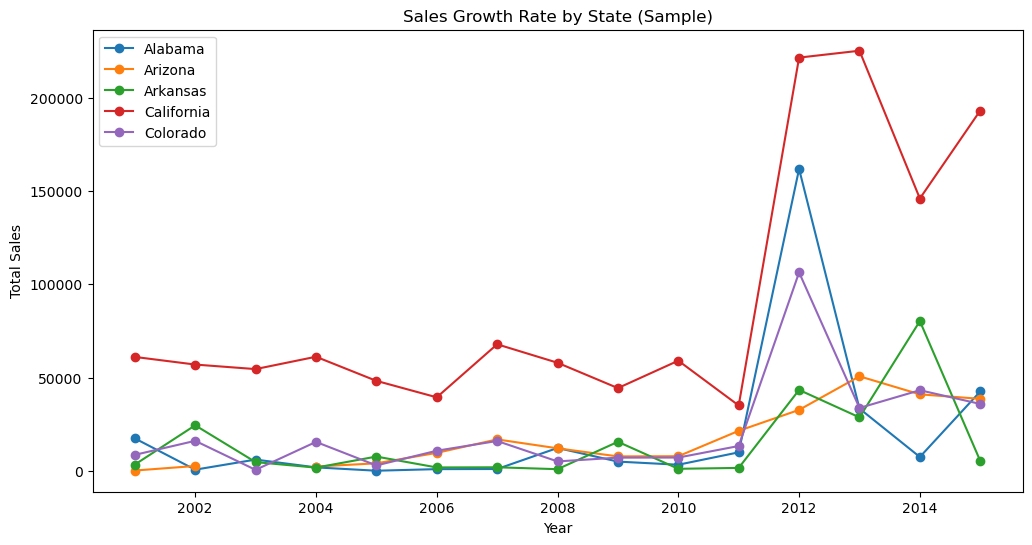

In [53]:
plt.figure(figsize=(12, 6))

for state in sample_states:
    plt.plot(sales_pivot.index, sales_pivot[state], marker='o', label=state)  
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Growth Rate by State (Sample)")
plt.legend()
plt.show()

In [55]:
query = """
SELECT 
    Region, 
    "Product Name", 
    SUM(Profit) AS Total_Profit
FROM walmart_sales
GROUP BY Region, "Product Name"
ORDER BY Region, Total_Profit DESC;
"""

In [57]:
profitable_products = pd.read_sql(query, conn)

In [59]:
print(profitable_products.groupby("Region").head(3))

       Region                                       Product Name  Total_Profit
0     Central               Hewlett Packard LaserJet 3310 Copier      24373.84
1     Central  Fellowes PB500 Electric Punch Plastic Comb Bin...      19368.88
2     Central  Hewlett-Packard cp1700 [D, PS] Series Color In...      18618.80
1052     East     Global Troy Executive Leather Low-Back Tilter      43053.11
1053     East            GBC DocuBind 200 Manual Binding Machine      17682.07
1054     East              Panasonic KX-P3626 Dot Matrix Printer      15572.91
1968    South   Polycom ViewStation ISDN Videoconferencing Unit      31072.88
1969    South               Hewlett Packard LaserJet 3310 Copier      23156.32
1970    South        Fellowes PB300 Plastic Comb Binding Machine      19864.34
2882     West                                 Canon PC940 Copier      26653.30
2883     West     Global Troy Executive Leather Low-Back Tilter      22889.93
2884     West  Hewlett-Packard cp1700 [D, PS] Series